In [32]:
import pandas as pd
df = pd.read_csv('bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
positive=df[df["y"]=="no"]
negative=df[df["y"]=="yes"]
print("Total rows : ",df.shape[0],"Positive : ",positive.shape[0],"Negative : ",negative.shape[0])

Total rows :  41188 Positive :  36548 Negative :  4640


<BarContainer object of 2 artists>

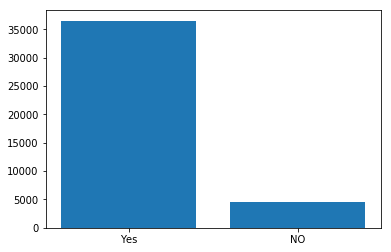

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(["Yes","NO"],[positive.shape[0],negative.shape[0]])

In [38]:
columns= ["contact","month","day_of_week"]
df= df.drop(columns,axis=1)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [47]:
#one hot encoding all the string datas
df = pd.get_dummies(df,columns=["job","marital","education","default","housing","loan","poutcome"],drop_first=True)
#newdf.columns

In [48]:
X=df.loc[:,df.columns!="y"].values
Y=df.loc[:,df.columns=="y"].values.flatten()

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2);

In [51]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Imputer, RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfmodel=RandomForestClassifier(n_estimators=50,max_features=0.25,criterion="entropy",class_weight="balanced")
Model=make_pipeline(Imputer(strategy='mean'),
                                RobustScaler(),
                                SMOTE(),
                                rfmodel)
#new = cross_val_score(Model,x_train,y_train,cv=10).mean()

In [62]:
Model.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('smote', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=...tors=50, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False))])